In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Loading**

In [ ]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import string
import nltk
import seaborn as sns

In [ ]:
#importing Dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
dframe = pd.read_csv('/content/drive/MyDrive/Projects/Sentiment analysis/twitter_dataset.csv', encoding='ISO-8859-1',names=DATASET_COLUMNS)
dframe.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
#checking for any null comments
dframe.isnull().any()

target    False
ids       False
date      False
flag      False
user      False
text      False
dtype: bool

In [ ]:
#Identifying the targets
unique_targets = dframe['target'].unique()
print(unique_targets)

[0 4]


In [ ]:
#converting 4 to 1
dframe['target'].replace(4, 1, inplace=True)

In [ ]:
unique_targets = dframe['target'].unique()
print(unique_targets)

[0 1]


In [ ]:
#checking rows and column
dframe.shape

(1600000, 6)

Data Visualization

In [ ]:
# Counting the occurrences of each unique value in the 'target' column
target_counts = dframe['target'].value_counts()
print(target_counts)

0    800000
1    800000
Name: target, dtype: int64


In [ ]:
num_zeros = target_counts[0]

num_ones = target_counts[1]

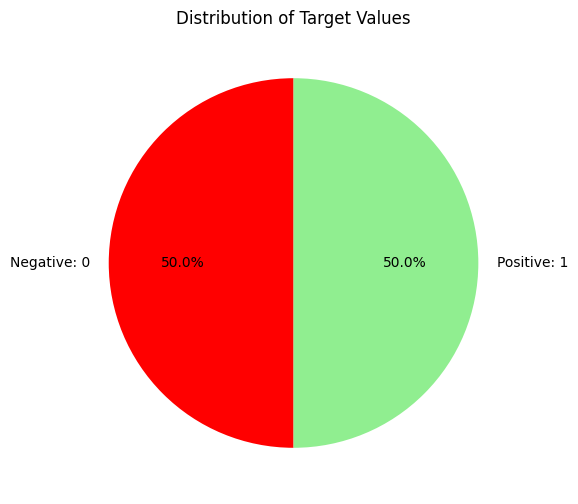

In [ ]:
# Creating the pie chart
plt.figure(figsize=(6, 6))
plt.pie([num_zeros, num_ones], labels=['Negative: 0', 'Positive: 1'], colors=['red', 'lightgreen'], autopct='%1.1f%%', startangle=90)

plt.title('Distribution of Target Values')

plt.show()

In [ ]:
#Checking sentiment distribution over time
dframe['date'] = pd.to_datetime(dframe['date'])

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [ ]:
unique_targets = dframe['date'].unique()
print(unique_targets)
print(unique_targets.shape)

['2009-04-06T22:19:45.000000000' '2009-04-06T22:19:49.000000000'
 '2009-04-06T22:19:53.000000000' ... '2009-06-16T08:38:58.000000000'
 '2009-06-16T08:39:00.000000000' '2009-06-16T08:40:50.000000000']
(774363,)


In [ ]:
sentiment_time = dframe.groupby([pd.Grouper(key='date', freq='D'), 'target']).size().unstack(fill_value=0)
print(sentiment_time)

target          0      1
date                    
2009-04-06   1426   1934
2009-04-07   7149  10162
2009-04-17   1244   1840
2009-04-18   9040  12714
2009-04-19  11427  16042
2009-04-20   7817  10643
2009-04-21   3504   5083
2009-05-01   3254   4462
2009-05-02  11398  16036
2009-05-03  14779  20554
2009-05-04   6438   9043
2009-05-09   4997   6742
2009-05-10  10702  15327
2009-05-11   1765   2421
2009-05-13   1776   2290
2009-05-14   7308  10152
2009-05-16   3838   5308
2009-05-17  14289  25865
2009-05-18  13358  23111
2009-05-21    788   1344
2009-05-22  13947  25127
2009-05-23     74     95
2009-05-25     71     98
2009-05-26   4357   6421
2009-05-27    367    474
2009-05-28   6186   9717
2009-05-29  29451  44376
2009-05-30  39279  64394
2009-05-31  36400  58188
2009-06-01  44297  65993
2009-06-02  25423  38769
2009-06-03  16019  25569
2009-06-04   3152   4690
2009-06-05  23568  35189
2009-06-06  43744  67932
2009-06-07  38168  58182
2009-06-14   3346   4926
2009-06-15  45358  64423


In [ ]:
sentiment_time.rename({0: 'Negative', 1: 'Positive'}, axis=1, inplace=True)

print(sentiment_time)

target      Negative  Positive
date                          
2009-04-06      1426      1934
2009-04-07      7149     10162
2009-04-17      1244      1840
2009-04-18      9040     12714
2009-04-19     11427     16042
2009-04-20      7817     10643
2009-04-21      3504      5083
2009-05-01      3254      4462
2009-05-02     11398     16036
2009-05-03     14779     20554
2009-05-04      6438      9043
2009-05-09      4997      6742
2009-05-10     10702     15327
2009-05-11      1765      2421
2009-05-13      1776      2290
2009-05-14      7308     10152
2009-05-16      3838      5308
2009-05-17     14289     25865
2009-05-18     13358     23111
2009-05-21       788      1344
2009-05-22     13947     25127
2009-05-23        74        95
2009-05-25        71        98
2009-05-26      4357      6421
2009-05-27       367       474
2009-05-28      6186      9717
2009-05-29     29451     44376
2009-05-30     39279     64394
2009-05-31     36400     58188
2009-06-01     44297     65993
2009-06-

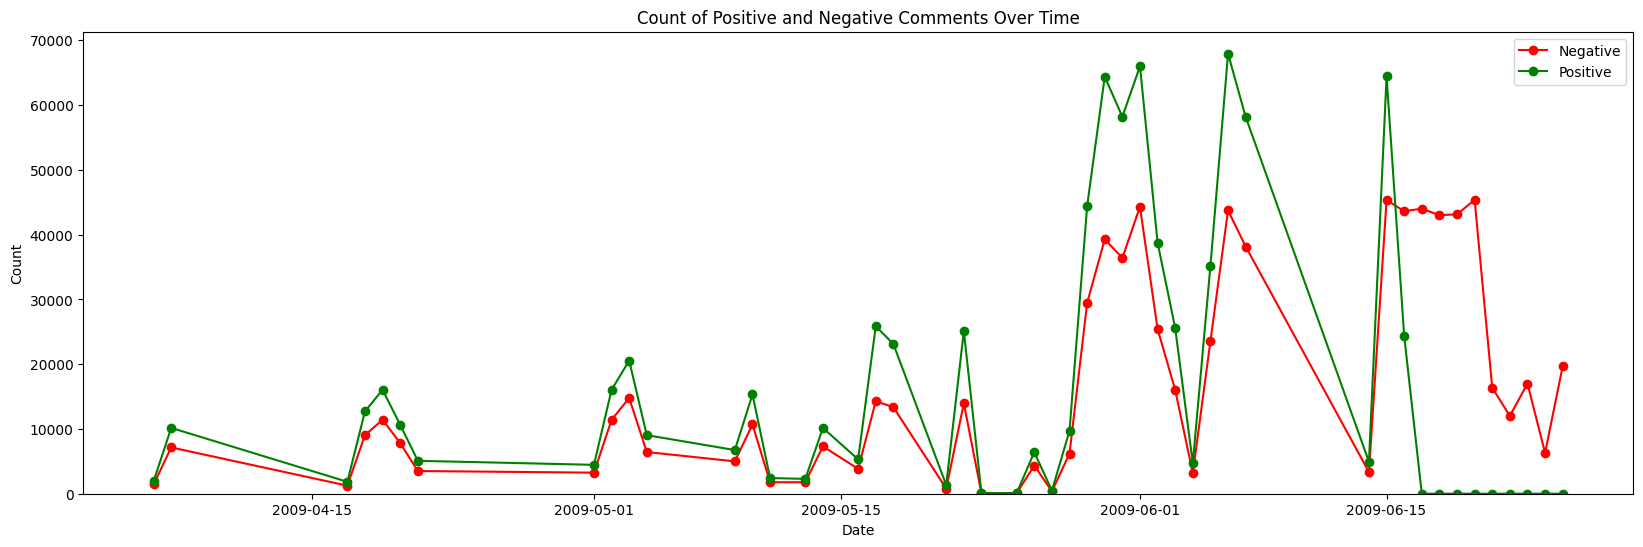

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(sentiment_time.index, sentiment_time['Negative'], marker='o', label='Negative', color='red')
plt.plot(sentiment_time.index, sentiment_time['Positive'],marker='o', label='Positive', color='green')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of Positive and Negative Comments Over Time')
plt.legend()

# Set the y-axis limits to include zero
plt.ylim(bottom=0)

plt.show()

In [ ]:
# Plotting histogram of text lengths
text_lengths = dframe['text'].apply(len)

In [ ]:
print(text_lengths)

0          115
1          111
2           89
3           47
4          111
          ... 
1599995     56
1599996     78
1599997     57
1599998     65
1599999     62
Name: text, Length: 1600000, dtype: int64


In [ ]:
# Counting the occurrences of each unique text length
text_length_counts = text_lengths.value_counts().sort_index()

In [ ]:
print(text_length_counts)

6         6
7        77
8      1182
9      1870
10     1863
       ... 
328       1
348       1
359       2
369       1
374       1
Name: text, Length: 257, dtype: int64


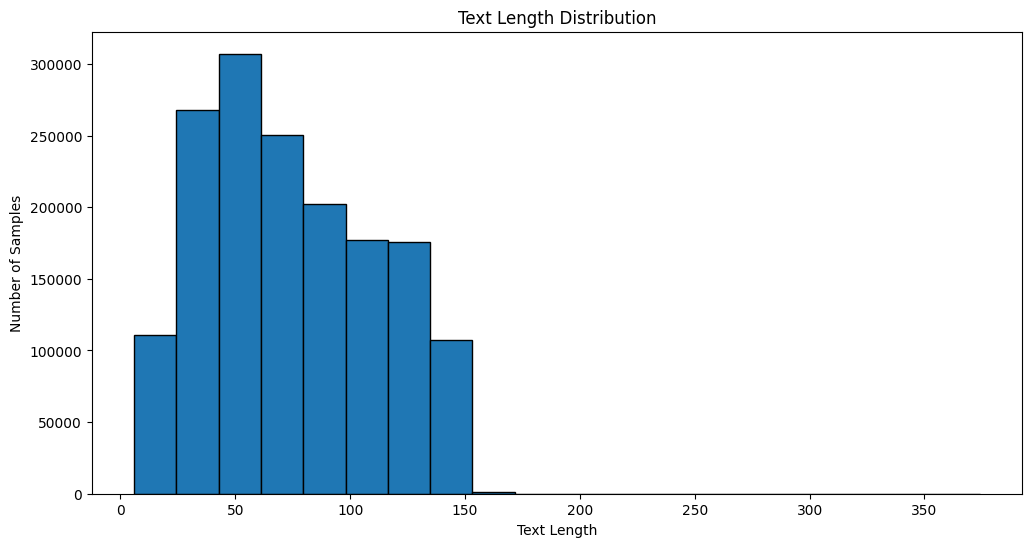

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(text_lengths, bins=20,edgecolor='black')
plt.xlabel('Text Length')
plt.ylabel('Number of Samples')
plt.title('Text Length Distribution')
plt.show()

In [ ]:
print('Mean text Length')
print(np.mean(text_lengths))

Mean text Length
74.09011125


In [ ]:
positive_texts = text_lengths[dframe['target'] == 1]
negative_texts = text_lengths[dframe['target'] == 0]

In [ ]:
print(type(positive_texts))

<class 'pandas.core.series.Series'>


In [ ]:
print(positive_texts)
print(negative_texts)

800000      44
800001      72
800002     137
800003     104
800004      47
          ... 
1599995     56
1599996     78
1599997     57
1599998     65
1599999     62
Name: text, Length: 800000, dtype: int64
0         115
1         111
2          89
3          47
4         111
         ... 
799995     63
799996     15
799997     29
799998     93
799999     82
Name: text, Length: 800000, dtype: int64


In [ ]:
print('Mean Positive text Length')
print(np.mean(positive_texts))

print('Mean Negative text Length')
print(np.mean(negative_texts))

Mean Positive text Length
73.8784325
Mean Negative text Length
74.30179


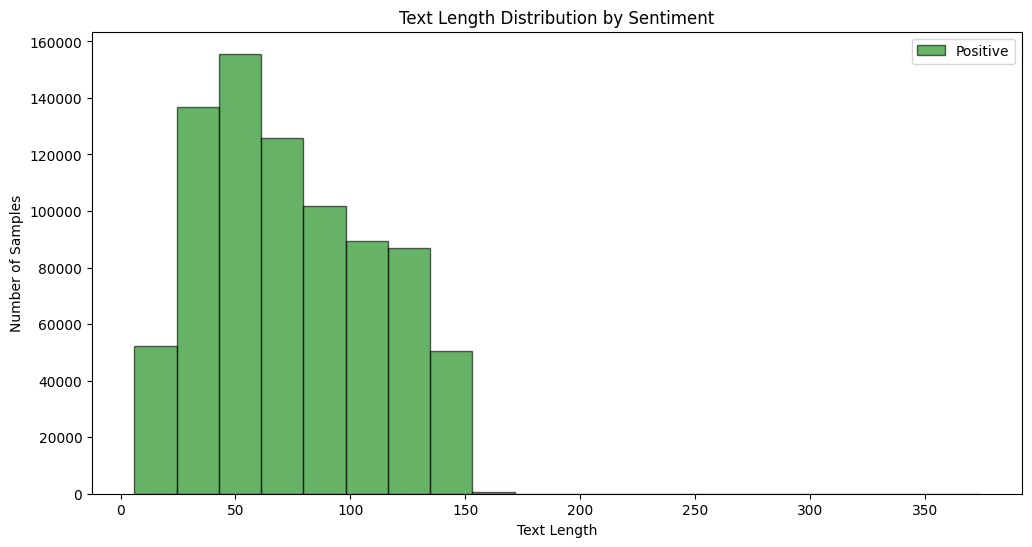

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(positive_texts, bins=20, color='green', alpha=0.6, edgecolor='black', label='Positive')
plt.xlabel('Text Length')
plt.ylabel('Number of Samples')
plt.title('Text Length Distribution by Sentiment')
plt.legend()
plt.show()


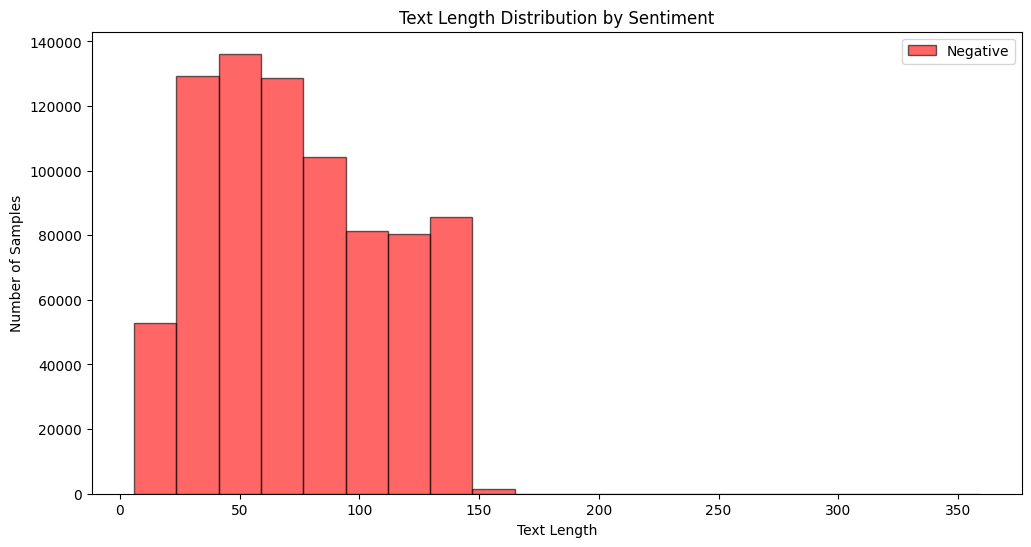

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(negative_texts, bins=20, color='red', alpha=0.6, edgecolor='black', label='Negative')
plt.xlabel('Text Length')
plt.ylabel('Number of Samples')
plt.title('Text Length Distribution by Sentiment')
plt.legend()
plt.show()

<ipython-input-34-48cf131bc4e0>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  p1=sns.kdeplot(positive_texts, shade=True, color="r").set_title('Distribution of Number Of positive and Negative words')
<ipython-input-34-48cf131bc4e0>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  p1=sns.kdeplot(negative_texts, shade=True, color="g")


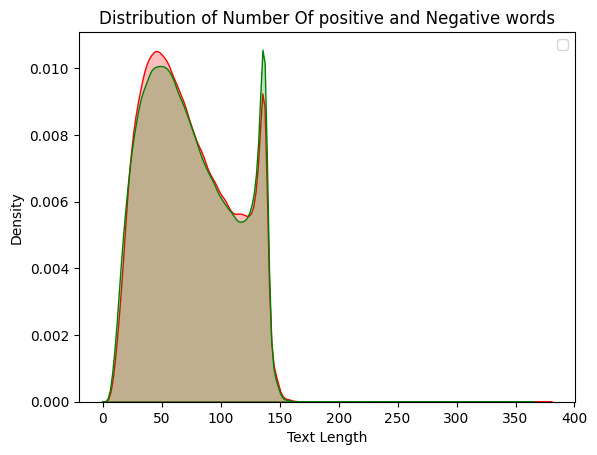

In [ ]:
p1=sns.kdeplot(positive_texts, shade=True, color="r").set_title('Distribution of Number Of positive and Negative words')
p1=sns.kdeplot(negative_texts, shade=True, color="g")

plt.xlabel('Text Length')
plt.ylabel('Density')

plt.legend()
plt.show()

In [ ]:
#Counting sentiments with respect to the users
sentiment_counts = dframe.groupby(['user', 'target']).size().unstack(fill_value=0)

In [ ]:
sentiment_counts_positive = sentiment_counts.sort_values(by=1, ascending=False)
sentiment_counts_negative = sentiment_counts.sort_values(by=0, ascending=False)

In [ ]:
print(sentiment_counts)

target           0  1
user                 
000catnap000     1  5
000matthewkelly  0  1
000yea000        0  1
0010x0010        0  1
001BabyGirl      0  2
...             .. ..
zzztar           0  2
zzzum            0  1
zzzunzinnn       0  3
zzzyourdreamzzz  1  0
zzzzeus111       1  0

[659775 rows x 2 columns]


In [ ]:
positive_counts_sorted = sentiment_counts_positive[1]
negative_counts_sorted = sentiment_counts_negative[0]

In [ ]:
print(positive_counts_sorted)
print(negative_counts_sorted)

user
what_bugs_u     246
DarkPiano       231
VioletsCRUK     218
tsarnick        212
keza34          211
               ... 
cathole612        0
cathnutz          0
cathleneyork      0
cathleneee        0
zzzzeus111        0
Name: 1, Length: 659775, dtype: int64
user
lost_dog       549
tweetpet       310
webwoke        264
wowlew         210
mcraddictal    210
              ... 
kat130904        0
PattySmall       0
kat15lee         0
kat1703          0
loveremains      0
Name: 0, Length: 659775, dtype: int64


In [ ]:
print(positive_counts_sorted[0:49])

user
what_bugs_u        246
DarkPiano          231
VioletsCRUK        218
tsarnick           212
keza34             211
shanajaca          204
TraceyHewins       193
ramdomthoughts     190
thisgoeshere       178
KevinEdwardsJr     171
Scyranth           162
enamoredsoul       159
Quimo              150
cookiemonster82    148
maynaseric         146
shellrawlins       146
Jayme1988          146
linnetwoods        145
whitsundays        144
felicityfuller     143
Dutchrudder        141
rgoodchild         141
jaybranch          139
original_one       137
lesley007          134
Broooooke_         132
Djalfy             132
tallivansunder     132
paul_steele        130
twebbstack         130
x33ieroNINJA       129
SongoftheOss       128
DonniesGirl69      126
MTVnHollyWEST23    126
chiniehdiaz        123
TizBanana          123
SarahSaner         121
torilovesbradie    120
Karen230683        119
JessMcFlyxxx       118
heykim             118
Tyrone17           116
MandyPandy32       116
longes

In [ ]:
print(positive_counts_sorted[positive_counts_sorted==max(positive_counts_sorted)],max(positive_counts_sorted))

print(negative_counts_sorted[negative_counts_sorted==max(negative_counts_sorted)],max(negative_counts_sorted))

user
what_bugs_u    246
Name: 1, dtype: int64 246
user
lost_dog    549
Name: 0, dtype: int64 549


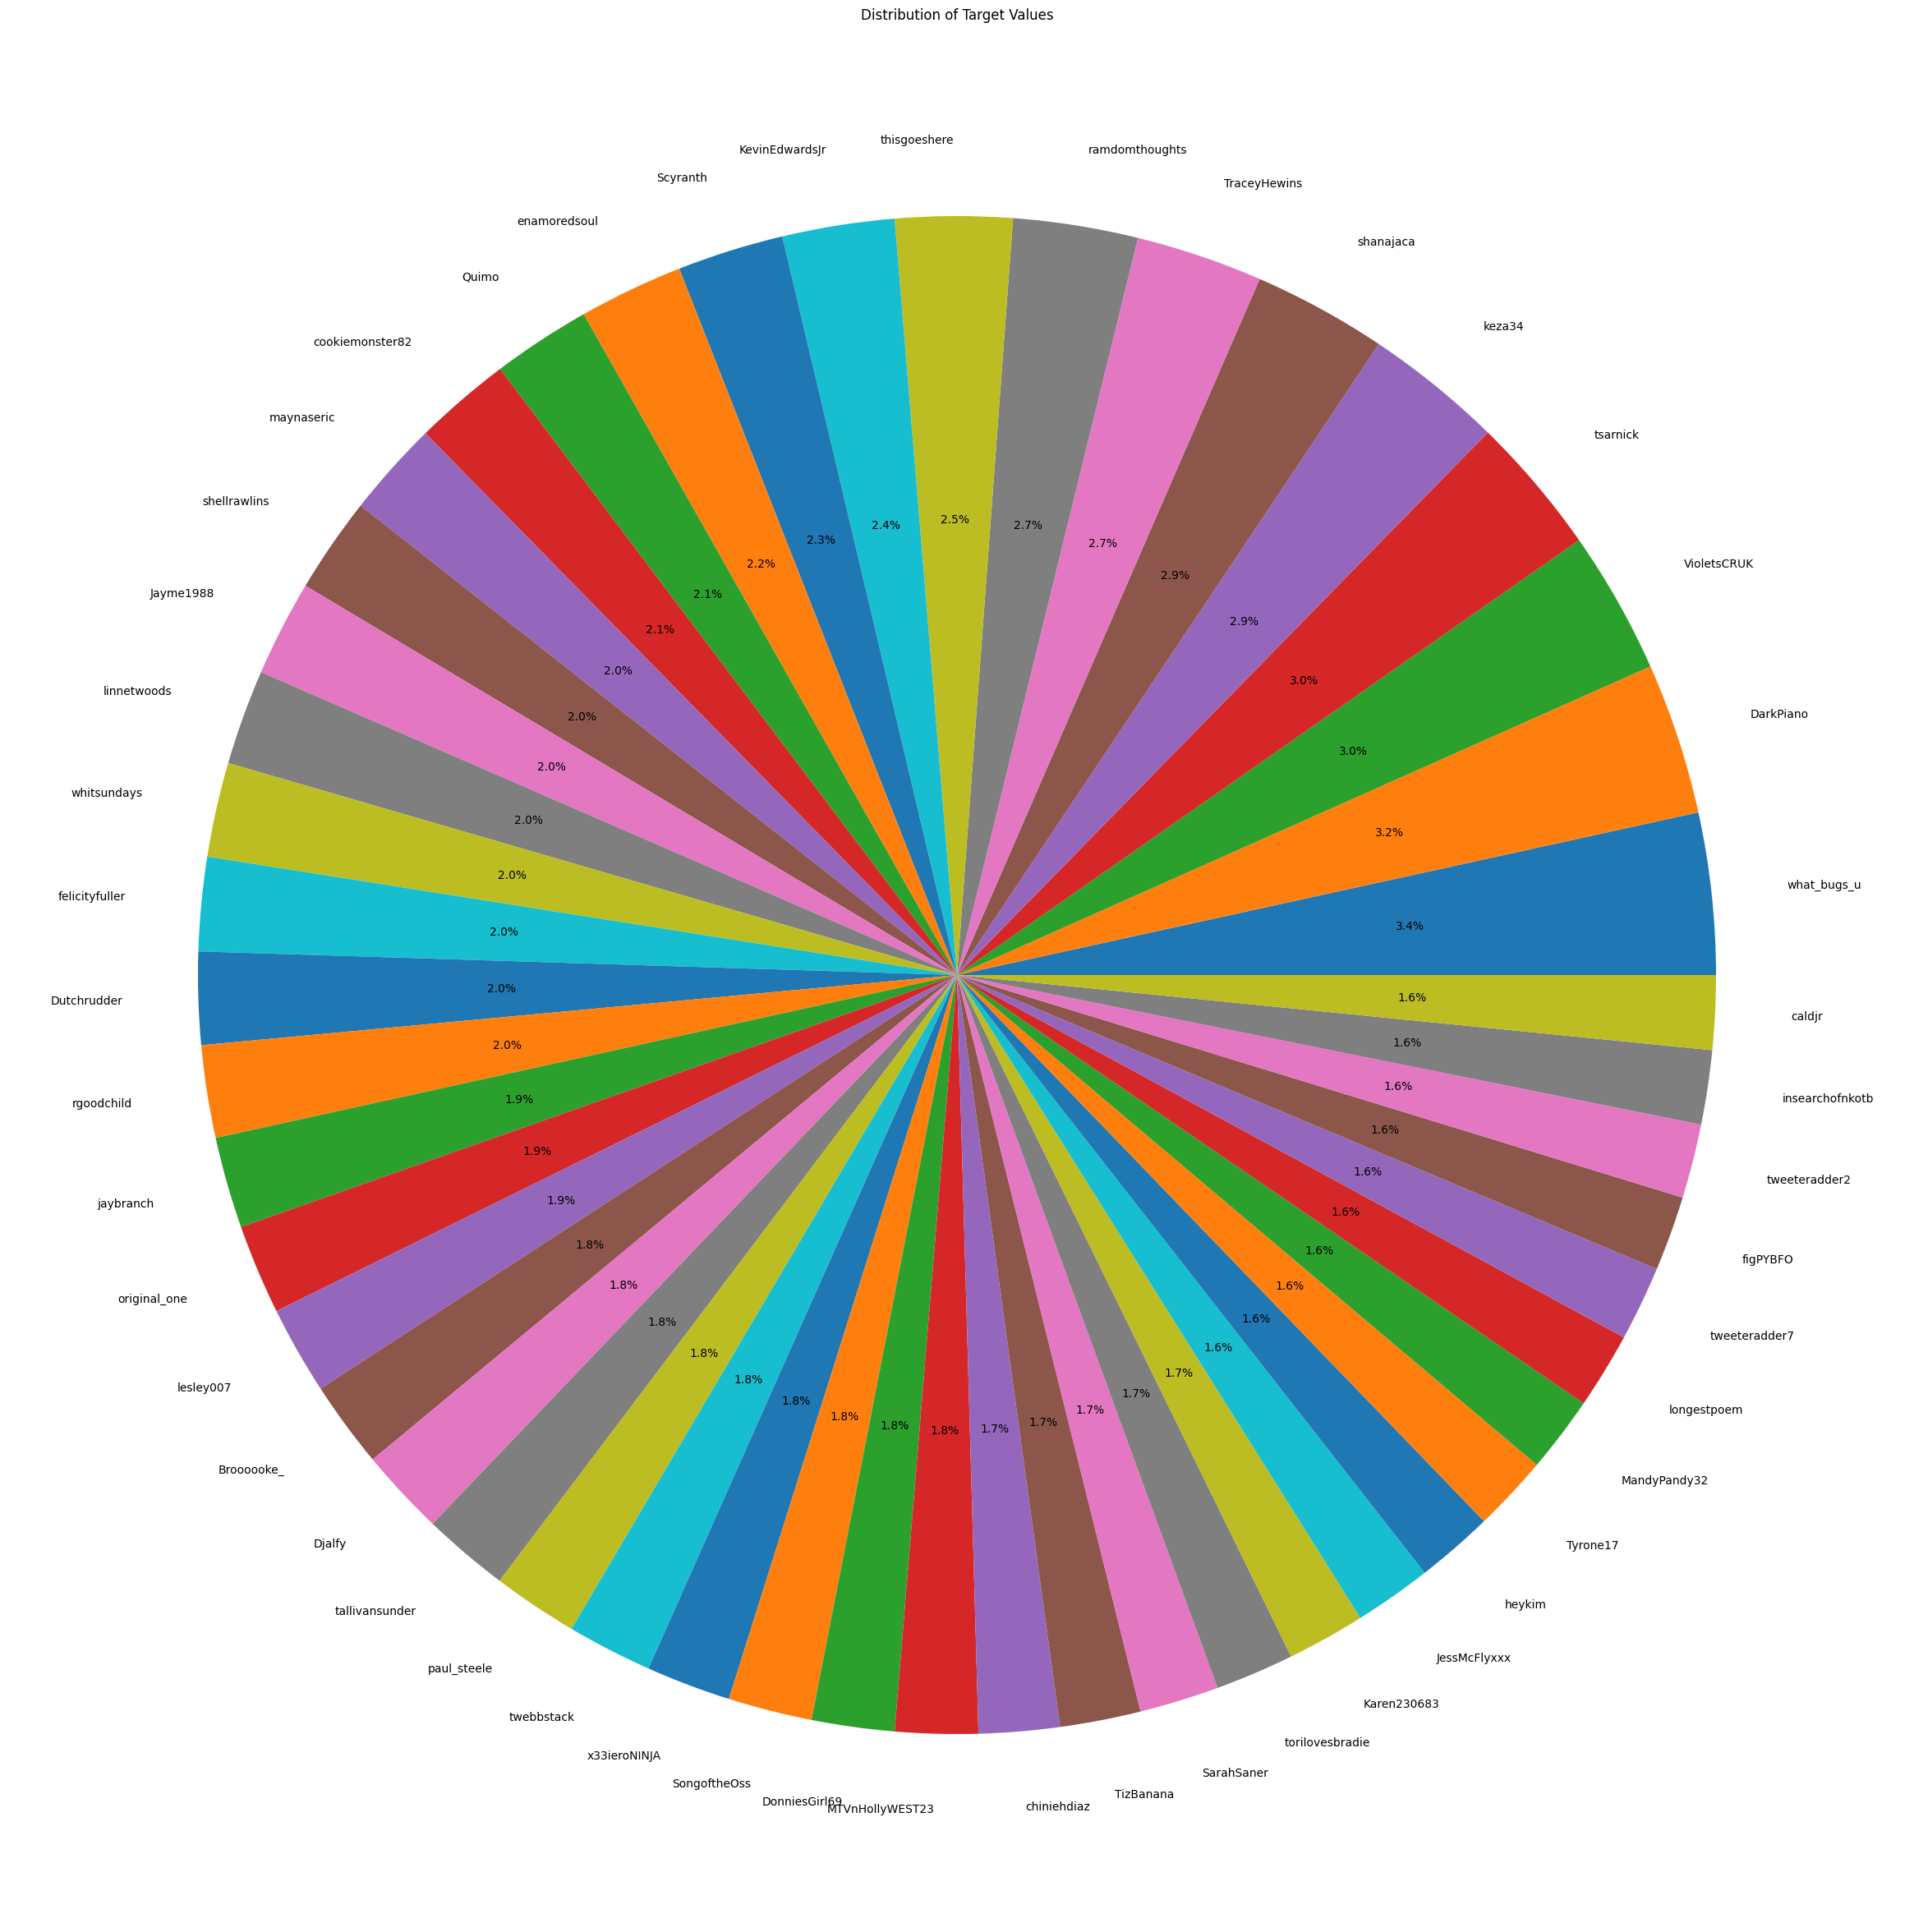

In [ ]:
plt.figure(figsize=(30,30))
plt.pie(positive_counts_sorted[0:49], labels=positive_counts_sorted.index[0:49], autopct='%1.1f%%')

plt.title('Distribution of Target Values')

plt.show()

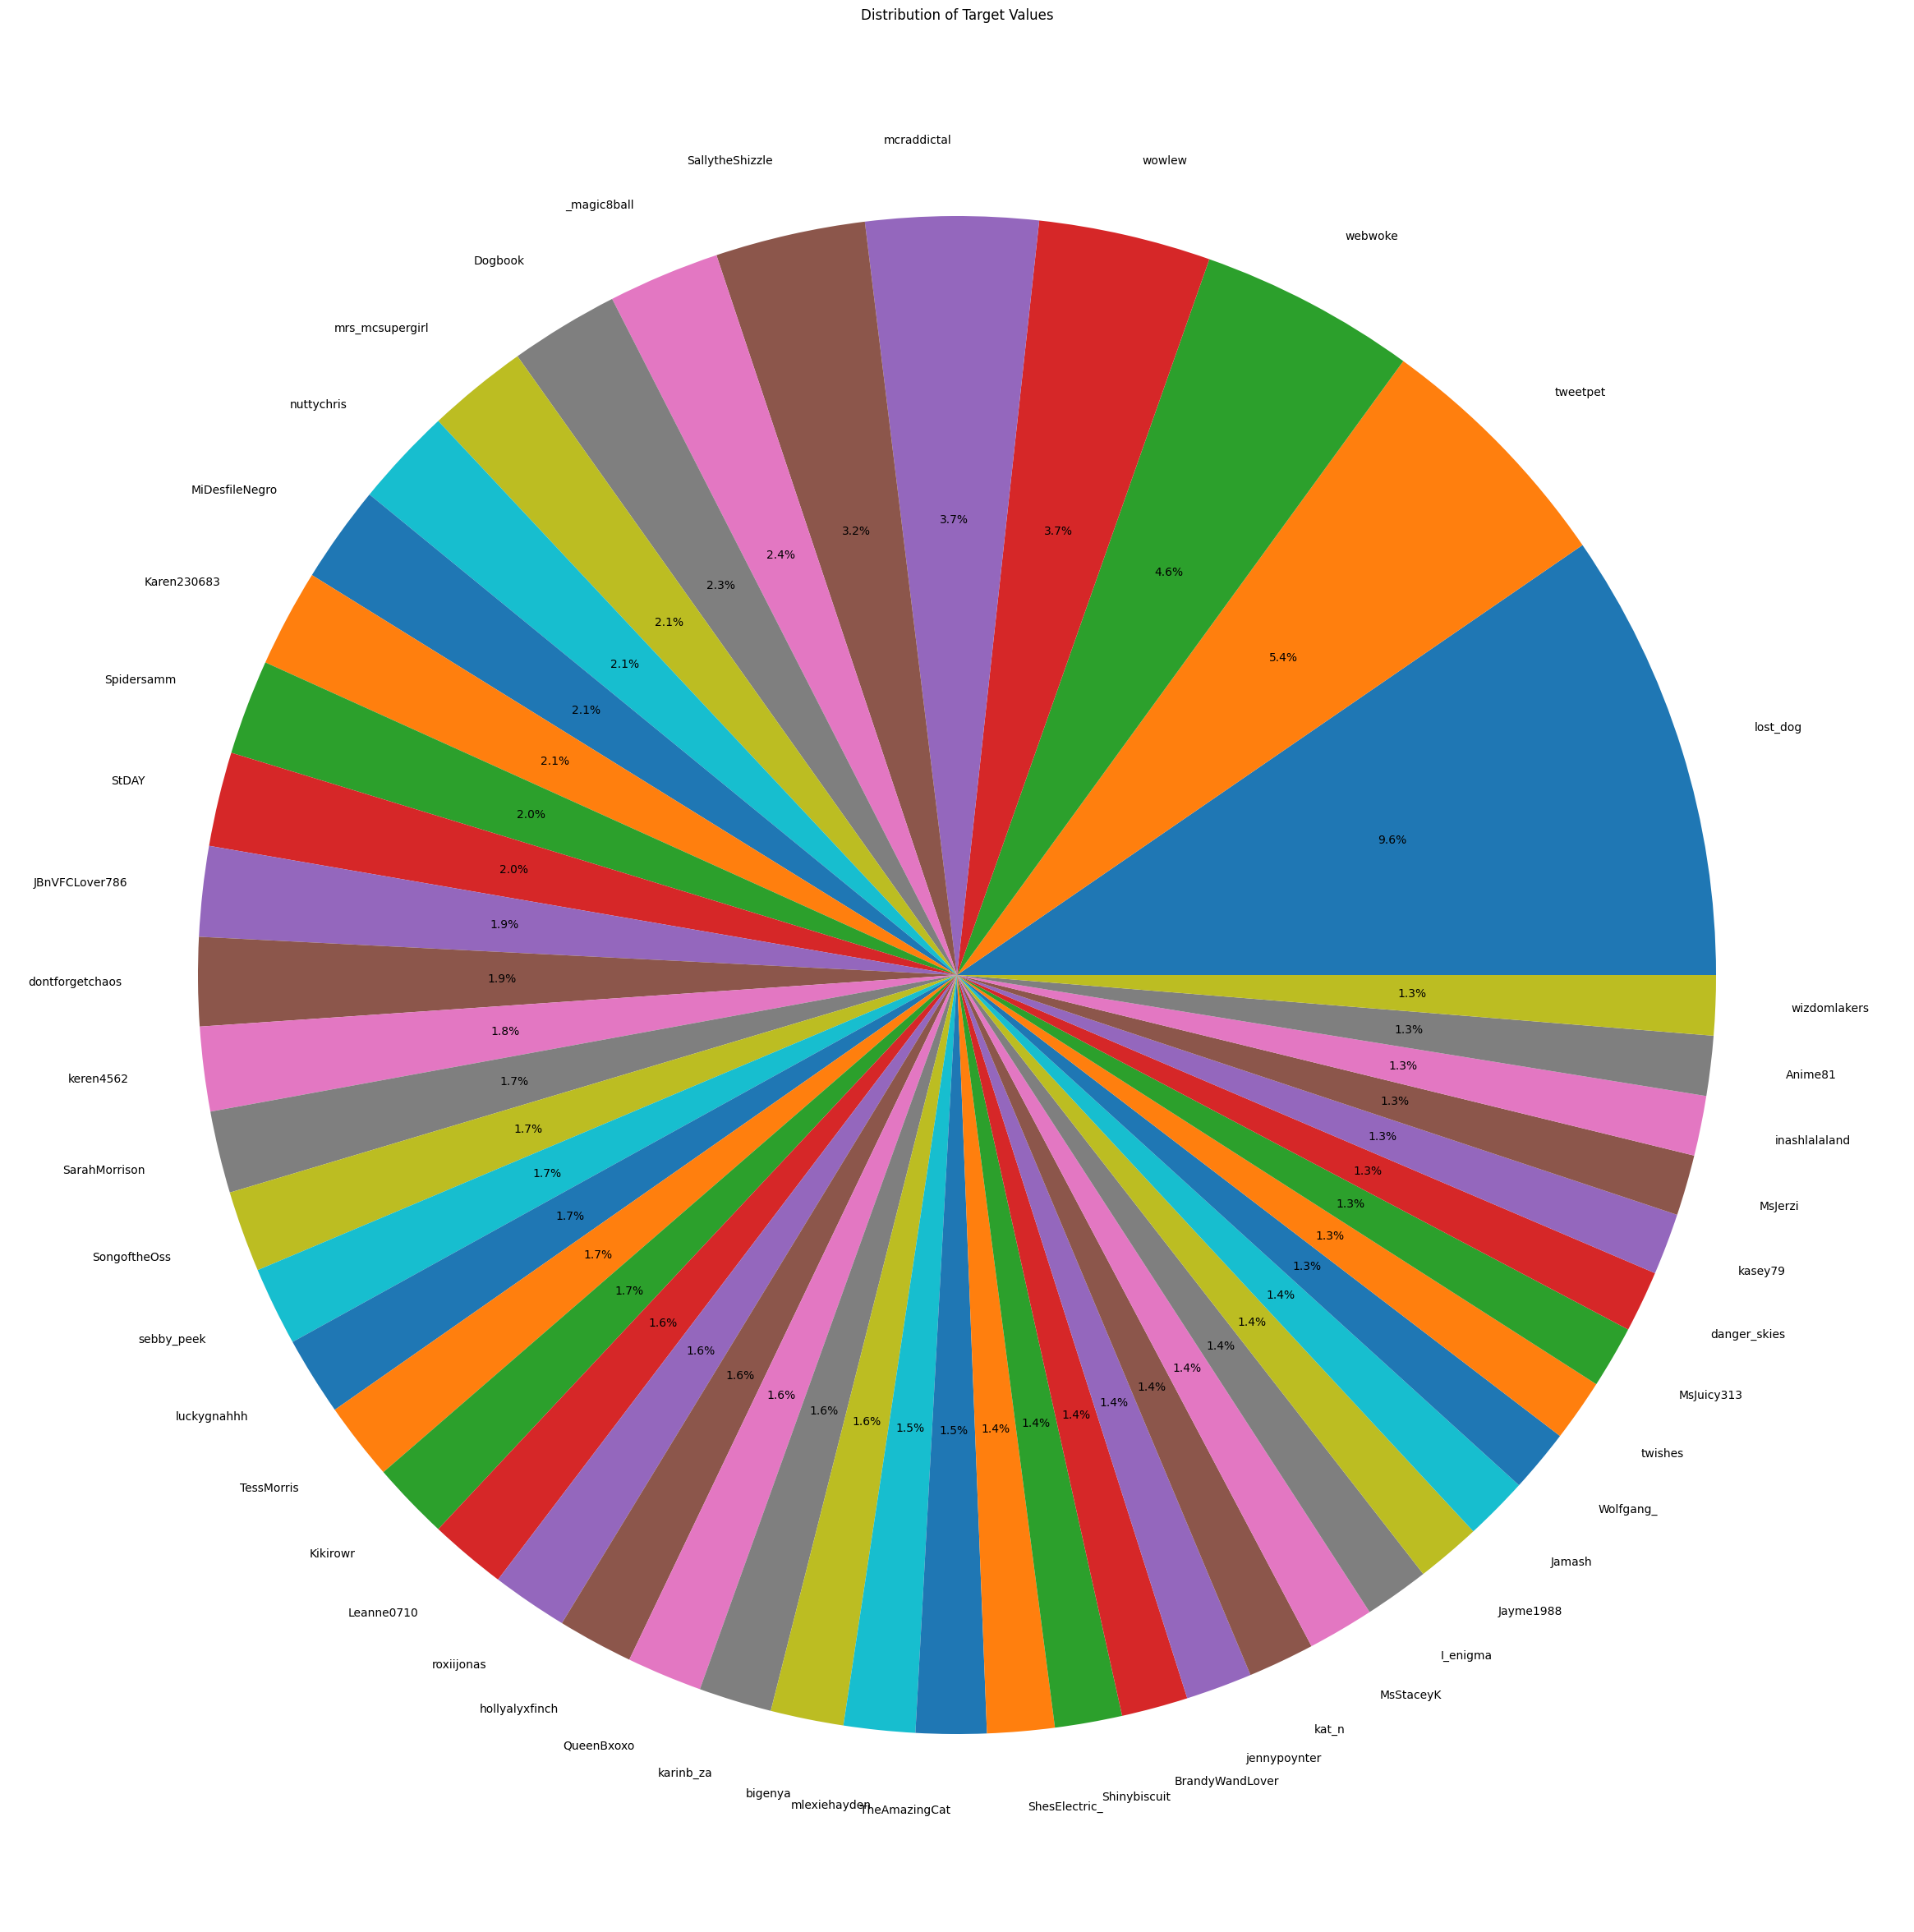

In [ ]:
plt.figure(figsize=(30,30))
plt.pie(negative_counts_sorted[0:49], labels=negative_counts_sorted.index[0:49], autopct='%1.1f%%')

plt.title('Distribution of Target Values')

plt.show()

# **Data Preprocessing**

In [ ]:
df = dframe[['target', 'text']]
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
#Converting every uppercase to lowercase
df['clean_text']=df['text'].str.lower()
df.head()

<ipython-input-45-1a019b1caea1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text']=df['text'].str.lower()


,target,text,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,@kenichan i dived many times for the ball. man...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all...."


In [ ]:
#Removing URLs
data="@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it"
txt=re.sub(r"(https?://|www\.)\S+",' ',data)#removing the entire url
txt=re.sub(r"(www\.|https?://)",' ',txt)#removing broken url(incomplete)
print(txt)

@switchfoot   - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it


In [ ]:
def cleaning_URLs(data):
    txt=re.sub(r"(https?://|www\.)\S+",' ',data)
    return re.sub(r"(www\.|https?://)",' ',txt)

df['clean_text'] = df['clean_text'].apply(lambda x: cleaning_URLs(x))
df.head()

<ipython-input-47-0257b512767e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['clean_text'].apply(lambda x: cleaning_URLs(x))


,target,text,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot - awww, that's a bummer. you sh..."
1,0,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,@kenichan i dived many times for the ball. man...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all...."


In [ ]:
#Removing punctuations
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
txt="@switchfoot - awww, that's a bummer"
txt_nopunct="".join([char for char in txt if char not in string.punctuation]) #character comparasion is done not word comparasion
print(txt_nopunct)

switchfoot  awww thats a bummer


In [ ]:
def remove_punctuation(txt):
 txt_nopunct="".join([c for c in txt if c not in string.punctuation])
 return txt_nopunct

df['clean_text']=df['clean_text'].apply(lambda x:remove_punctuation(x))
df.head()

<ipython-input-50-57fa87028013>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text']=df['clean_text'].apply(lambda x:remove_punctuation(x))


,target,text,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot awww thats a bummer you shoulda...
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,0,@Kenichan I dived many times for the ball. Man...,kenichan i dived many times for the ball manag...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",nationwideclass no its not behaving at all im ...


In [ ]:
#Removing numbers
txt="1234  how are you 456"
txt_withoutnum=re.sub('[0-9]+', '',txt)
print(txt_withoutnum)

  how are you 


In [ ]:
def cleaning_numbers(txt):
    return re.sub('[0-9]+', '', txt)

df['clean_text'] = df['clean_text'].apply(lambda x: cleaning_numbers(x))
df.head()

<ipython-input-52-6a9cd77d5265>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['clean_text'].apply(lambda x: cleaning_numbers(x))


,target,text,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot awww thats a bummer you shoulda...
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,0,@Kenichan I dived many times for the ball. Man...,kenichan i dived many times for the ball manag...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",nationwideclass no its not behaving at all im ...


In [ ]:
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
txt="is upset that he cant update his facebook by"
txt_clean=" ".join([word for word in txt.split() if word not in stopwords])
print(txt_clean)

upset cant update facebook


In [ ]:
def remove_stopwords(txt):
  txt_clean=" ".join([word for word in txt.split() if word not in stopwords])
  return txt_clean

df['clean_text']=df['clean_text'].apply(lambda x:remove_stopwords(x))
df.head()

<ipython-input-55-824030f6070f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text']=df['clean_text'].apply(lambda x:remove_stopwords(x))


,target,text,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot awww thats bummer shoulda got david...
1,0,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,0,@Kenichan I dived many times for the ball. Man...,kenichan dived many times ball managed save re...
3,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving im mad cant see


In [ ]:
#Removing repeating characters
#Repeating characters are characters that occur consecutively multiple times in a sequence. For example, in the word "hello," the letter 'l' is repeated twice consecutively,
text="Helloooooooo success"
cleaned_text = re.sub(r'(\w)\1+', r'\1', text)
print(cleaned_text)

Helo suces


In [ ]:
def remove_repeating_characters(text):
    cleaned_text = re.sub(r'(\w)\1+', r'\1', text)
    return cleaned_text

df['clean_text']=df['clean_text'].apply(lambda x:remove_repeating_characters(x))
df.head()

<ipython-input-57-ddd371595d29>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text']=df['clean_text'].apply(lambda x:remove_repeating_characters(x))


,target,text,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfot aw thats bumer shoulda got david car...
1,0,is upset that he can't update his Facebook by ...,upset cant update facebok texting might cry re...
2,0,@Kenichan I dived many times for the ball. Man...,kenichan dived many times bal managed save res...
3,0,my whole body feels itchy and like its on fire,whole body fels itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",nationwideclas behaving im mad cant se


In [ ]:
#Tokenizing
def tokenize(txt):
  tokens=re.split('\W+',txt)
  return tokens

df['clean_text']=df['clean_text'].apply(lambda x:tokenize(x))
df.head()

#When the code is executed, it will split the txt into a list of tokens using the regular expression \W+.
#This means that any non-word characters (such as punctuation marks, spaces, etc.)
#will act as separators, and the text will be divided into individual words or tokens.

<ipython-input-58-81bb04d06f3a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text']=df['clean_text'].apply(lambda x:tokenize(x))


,target,text,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","[switchfot, aw, thats, bumer, shoulda, got, da..."
1,0,is upset that he can't update his Facebook by ...,"[upset, cant, update, facebok, texting, might,..."
2,0,@Kenichan I dived many times for the ball. Man...,"[kenichan, dived, many, times, bal, managed, s..."
3,0,my whole body feels itchy and like its on fire,"[whole, body, fels, itchy, like, fire]"
4,0,"@nationwideclass no, it's not behaving at all....","[nationwideclas, behaving, im, mad, cant, se]"


In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
lemma= nltk.WordNetLemmatizer()

def lemmatization(token_txt):
  text=[lemma.lemmatize(word) for word in token_txt]
  return text
df['clean_text']=df['clean_text'].apply(lambda x:lemmatization(x))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
<ipython-input-59-ddf1f44e1d89>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text']=df['clean_text'].apply(lambda x:lemmatization(x))


,target,text,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","[switchfot, aw, thats, bumer, shoulda, got, da..."
1,0,is upset that he can't update his Facebook by ...,"[upset, cant, update, facebok, texting, might,..."
2,0,@Kenichan I dived many times for the ball. Man...,"[kenichan, dived, many, time, bal, managed, sa..."
3,0,my whole body feels itchy and like its on fire,"[whole, body, fels, itchy, like, fire]"
4,0,"@nationwideclass no, it's not behaving at all....","[nationwideclas, behaving, im, mad, cant, se]"


In [ ]:
#lemmantizing
token_txt="The cats are chasing mice and playing with balls."
text=[lemma.lemmatize(word) for word in token_txt.split()]
print(text)

['The', 'cat', 'are', 'chasing', 'mouse', 'and', 'playing', 'with', 'balls.']


In [ ]:
df.head()

,target,text,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","[switchfot, aw, thats, bumer, shoulda, got, da..."
1,0,is upset that he can't update his Facebook by ...,"[upset, cant, update, facebok, texting, might,..."
2,0,@Kenichan I dived many times for the ball. Man...,"[kenichan, dived, many, time, bal, managed, sa..."
3,0,my whole body feels itchy and like its on fire,"[whole, body, fels, itchy, like, fire]"
4,0,"@nationwideclass no, it's not behaving at all....","[nationwideclas, behaving, im, mad, cant, se]"


In [ ]:
range(len(df['clean_text'])-1)

range(0, 1599999)

In [ ]:
df['clean_text']

0          [switchfot, aw, thats, bumer, shoulda, got, da...
1          [upset, cant, update, facebok, texting, might,...
2          [kenichan, dived, many, time, bal, managed, sa...
3                     [whole, body, fels, itchy, like, fire]
4              [nationwideclas, behaving, im, mad, cant, se]
                                 ...                        
1599995                    [woke, schol, best, feling, ever]
1599996    [thewdbcom, col, hear, old, walt, interview, â, ]
1599997                 [ready, mojo, makeover, ask, detail]
1599998    [hapy, th, birthday, bo, al, time, tupac, amar...
1599999    [hapy, charitytuesday, thenspc, sparkscharity,...
Name: clean_text, Length: 1600000, dtype: object

In [ ]:
tokenized_tweet=[]
for i in range(len(df['clean_text'])):
    tokenized_tweet.append(" ".join(df['clean_text'][i]))

In [ ]:
df['clean_tweet'] = tokenized_tweet
df.head()

<ipython-input-65-766595fb6ac2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_tweet'] = tokenized_tweet


,target,text,clean_text,clean_tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","[switchfot, aw, thats, bumer, shoulda, got, da...",switchfot aw thats bumer shoulda got david car...
1,0,is upset that he can't update his Facebook by ...,"[upset, cant, update, facebok, texting, might,...",upset cant update facebok texting might cry re...
2,0,@Kenichan I dived many times for the ball. Man...,"[kenichan, dived, many, time, bal, managed, sa...",kenichan dived many time bal managed save rest...
3,0,my whole body feels itchy and like its on fire,"[whole, body, fels, itchy, like, fire]",whole body fels itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....","[nationwideclas, behaving, im, mad, cant, se]",nationwideclas behaving im mad cant se


In [ ]:
df.to_csv('preprocessed_twitter_data.csv', index=False)

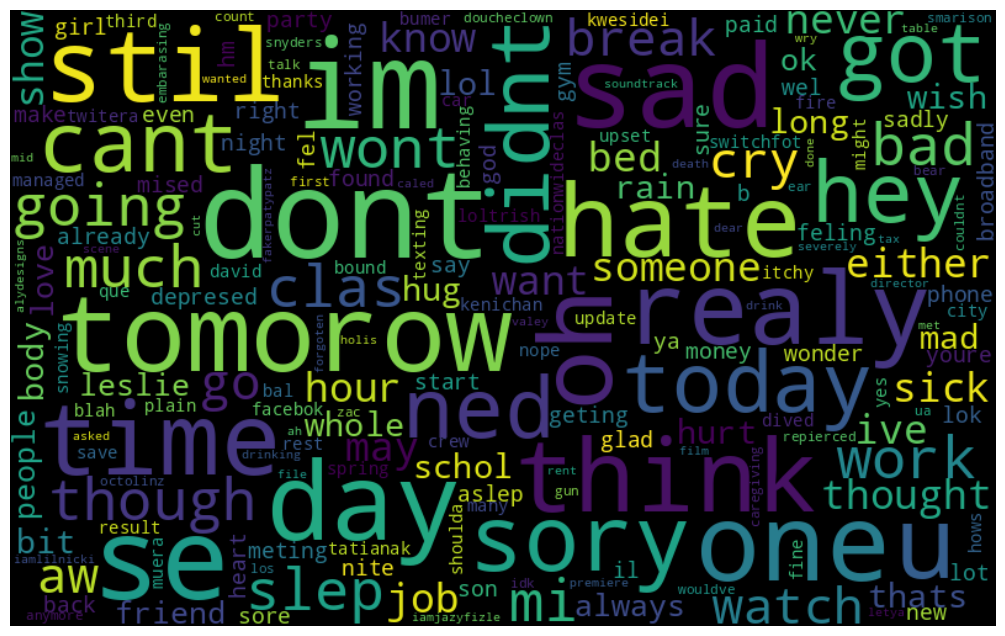

In [ ]:
all_words = " ".join([sentence for sentence in df['clean_tweet'][0:100]])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

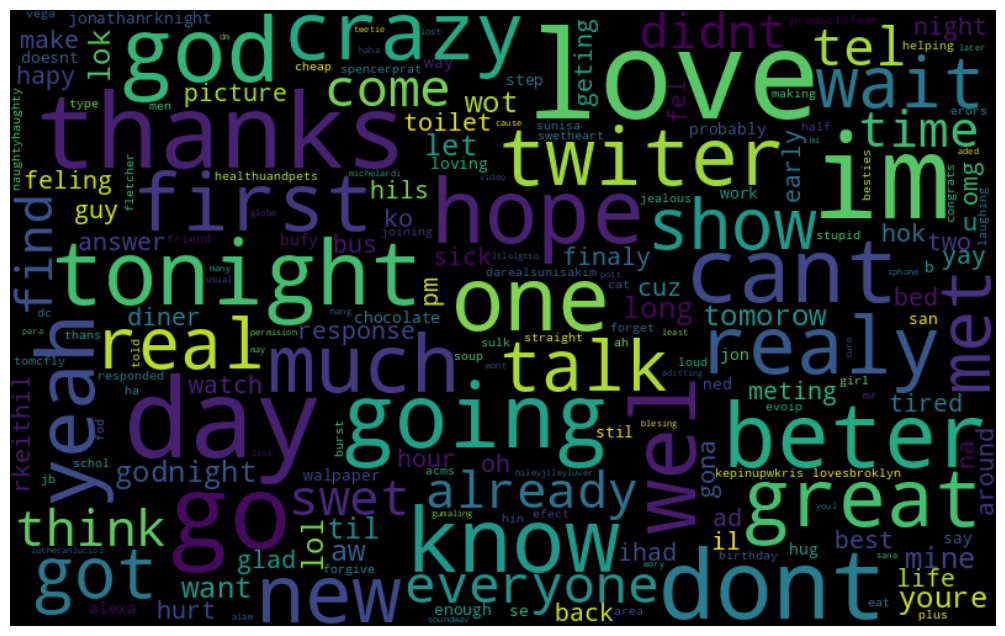

In [ ]:
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['target'] == 1][0:100]])


wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

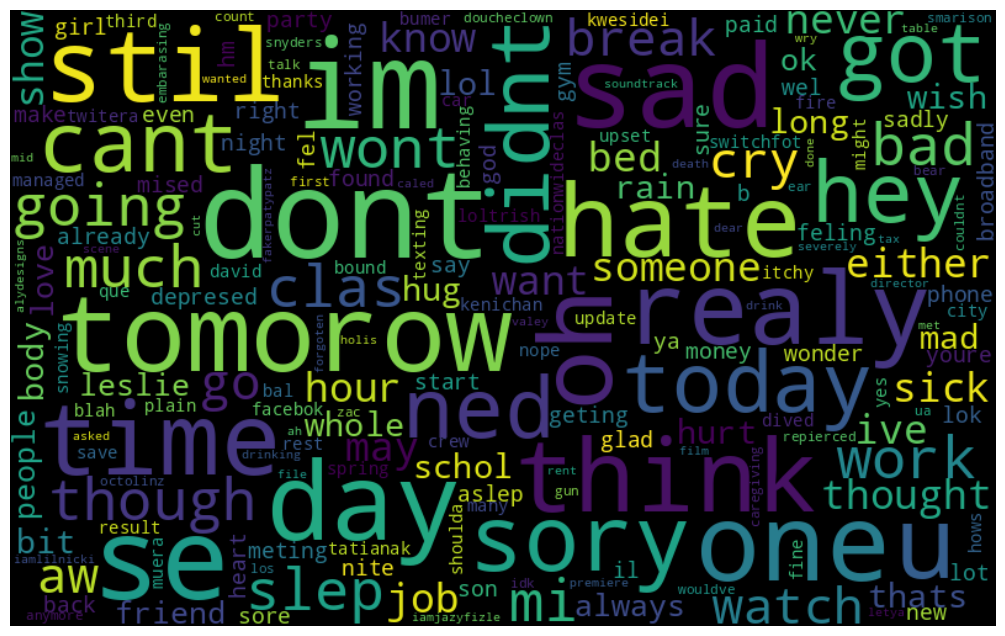

In [ ]:
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['target'] == 0][0:100]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df['clean_tweet'][df['target'] == 0][0:99]

0     switchfot aw thats bumer shoulda got david car...
1     upset cant update facebok texting might cry re...
2     kenichan dived many time bal managed save rest...
3                       whole body fels itchy like fire
4                nationwideclas behaving im mad cant se
                            ...                        
94    makeherfamous hm u realy enjoy problem constan...
95                              strider sick litle pupy
96    rylegracewana go steves party sadly since east...
97      hey actualy one bracket pol bad wasnt one money
98                         stark dont folow either work
Name: clean_tweet, Length: 99, dtype: object

# **Model Training**

In [ ]:
!pip install joblib

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score, accuracy_score,precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import joblib
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
words=[100,500,1000,2000,5000,7000,10000,20000,50000,100000,200000,500000,2000000,5000000,7000000,10000000,12000000,14000000,17000000,20000000]

In [ ]:
i=0
precisions=[]
for size in words:
  bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=size, stop_words='english')
  bow = bow_vectorizer.fit_transform(df['clean_tweet'])
  x_train, x_test, y_train, y_test = train_test_split(bow, df['target'], random_state=42, test_size=0.30)
  model = LogisticRegression()
  model.fit(x_train, y_train)
  pred = model.predict(x_test)
  precison=precision_score(y_test, pred)
  precisions.append(precison)
  print(i)
  i=i+1

0
1
2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


4


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


5


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


6


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


7


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


8


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


9


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


11


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


12


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


13


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


14


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


15


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


16


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


17


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


18


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


19


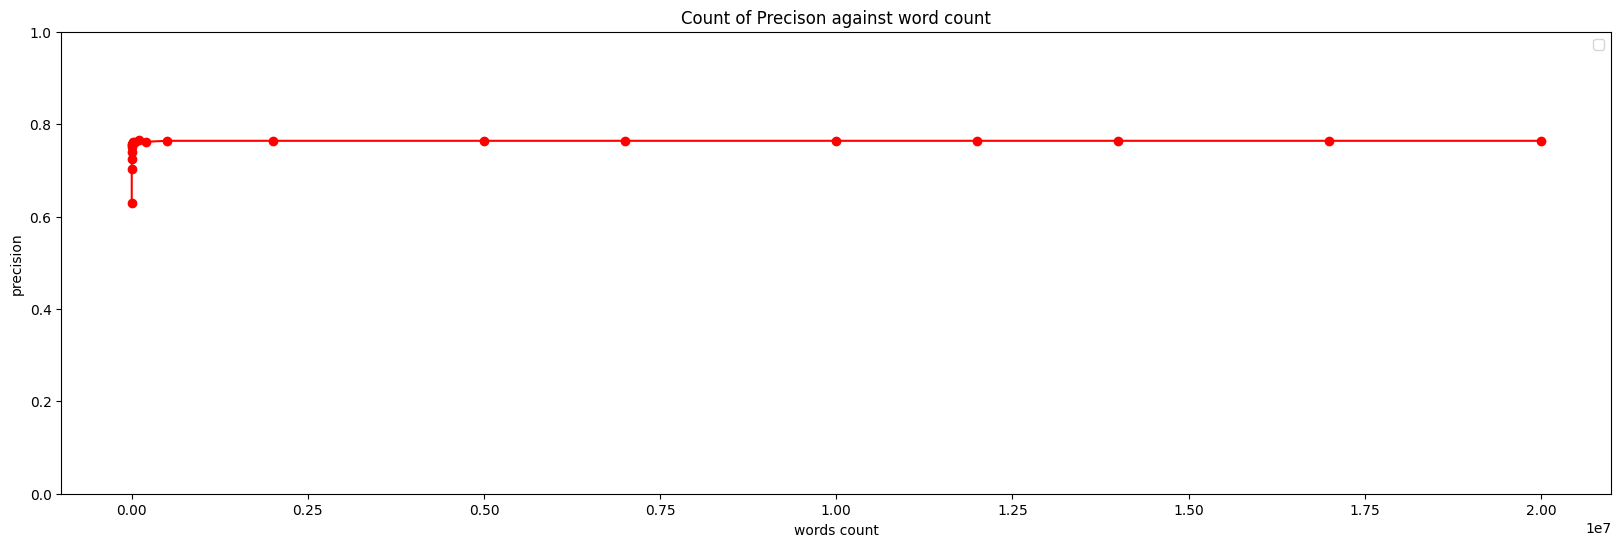

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(words,precisions, marker='o',color='red')

plt.xlabel('words count')
plt.ylabel('precision')
plt.title('Count of Precison against word count')

plt.legend()

# Setting the y-axis limits to include zero
plt.ylim(bottom=0,top=1)

plt.show()

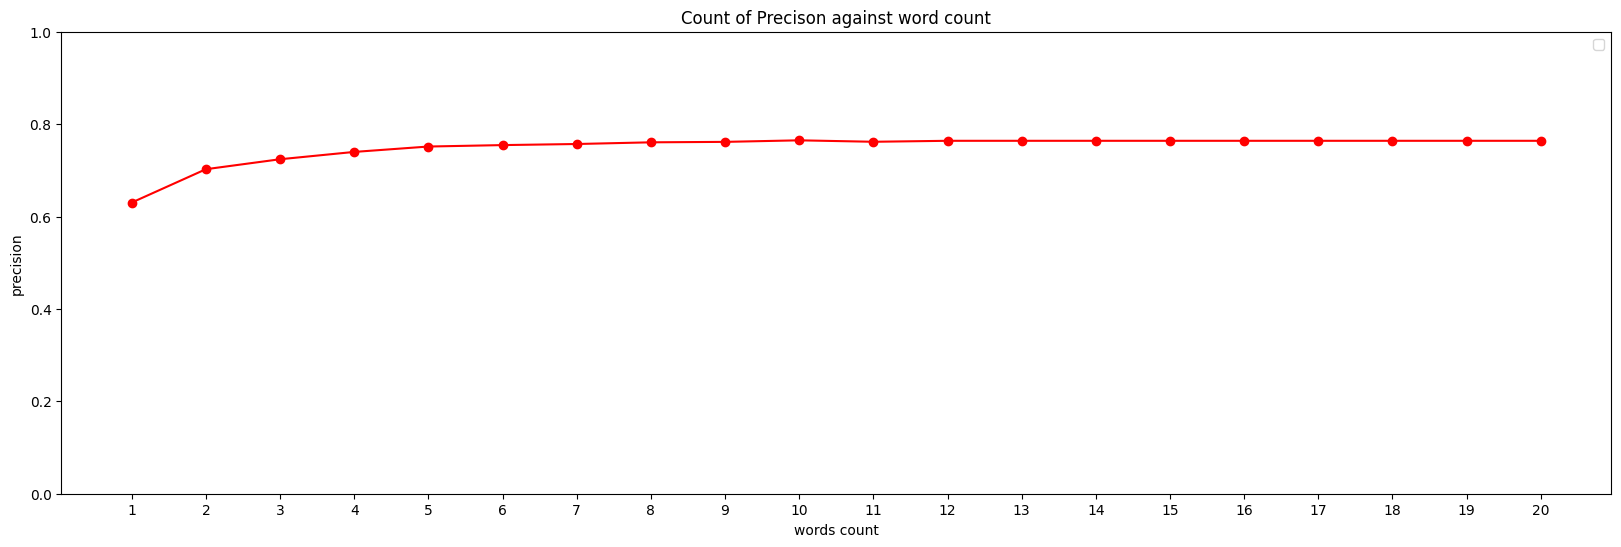

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(index,precisions, marker='o', color='red')

plt.xlabel('words count')
plt.ylabel('precision')
plt.title('Count of Precison against word count')

plt.xticks(index,index)
plt.legend()

# Set the y-axis limits to include zero
plt.ylim(bottom=0,top=1)

plt.show()

In [ ]:
i=0
precisions=[]
for size in words:
  bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=size, stop_words='english')
  bow = bow_vectorizer.fit_transform(df['clean_tweet'])
  x_train, x_test, y_train, y_test = train_test_split(bow, df['target'], random_state=42, test_size=0.30)
  model=MultinomialNB()
  model.fit(x_train, y_train)
  pred = model.predict(x_test)
  precison=precision_score(y_test, pred)
  precisions.append(precison)
  print(i)
  i=i+1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


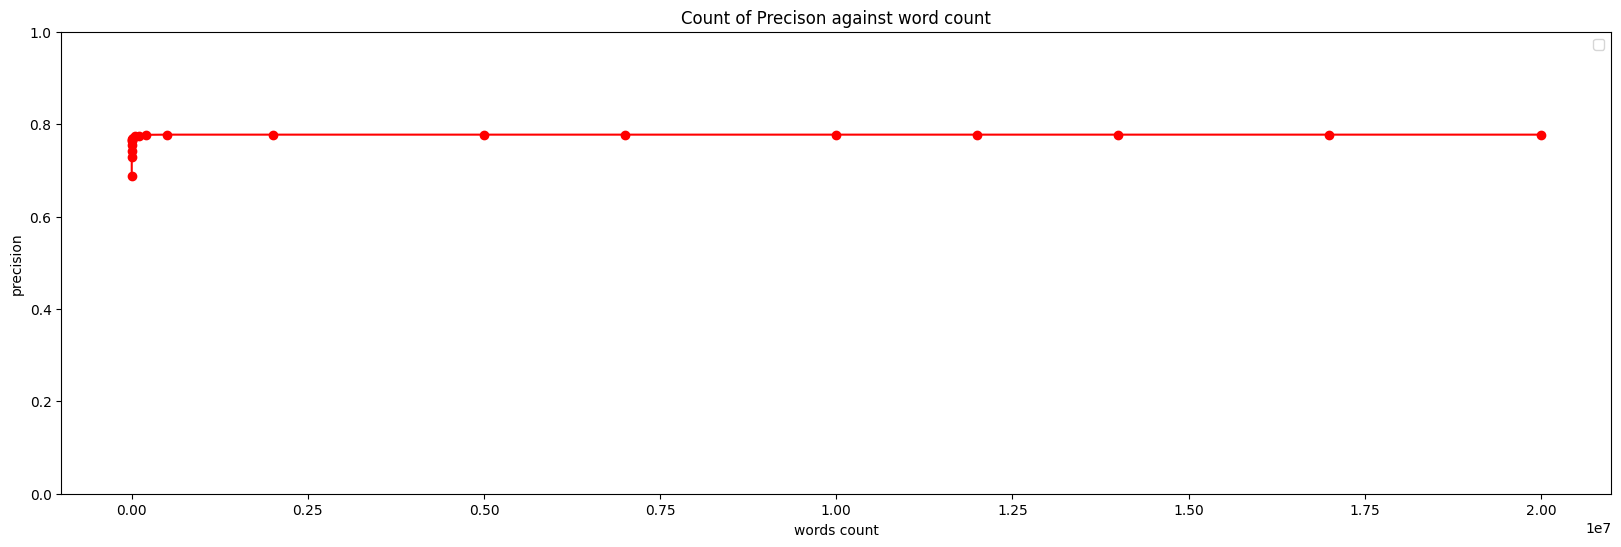

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(words,precisions, marker='o',color='red')

plt.xlabel('words count')
plt.ylabel('precision')
plt.title('Count of Precison against word count')

plt.legend()

# Set the y-axis limits to include zero
plt.ylim(bottom=0,top=1)

plt.show()

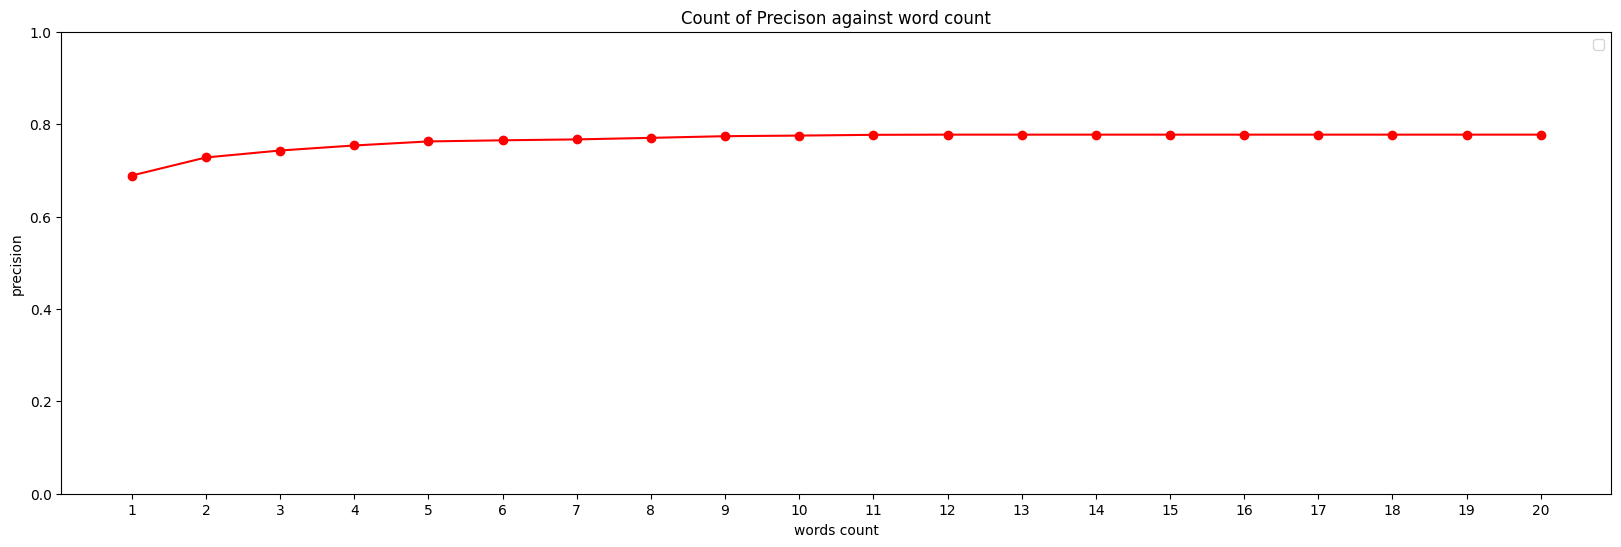

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(index,precisions, marker='o', color='red')

plt.xlabel('words count')
plt.ylabel('precision')
plt.title('Count of Precison against word count')

plt.xticks(index,index)
plt.legend()

# Set the y-axis limits to include zero
plt.ylim(bottom=0,top=1)

plt.show()

In [ ]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=5000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

x_train, x_test, y_train, y_test = train_test_split(bow, df['target'], random_state=42, test_size=0.30)

model = LogisticRegression()
model.fit(x_train, y_train)

pred = model.predict(x_test)
precison=precision_score(y_test, pred)

print(precison)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7514898433079009


In [ ]:
model_filename = 'sentiment_logistic_model.joblib'
joblib.dump(model, model_filename)

['sentiment_logistic_model.joblib']

In [ ]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=5000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

x_train, x_test, y_train, y_test = train_test_split(bow, df['target'], random_state=42, test_size=0.30)

model=MultinomialNB()
model.fit(x_train, y_train)

pred = model.predict(x_test)
precison=precision_score(y_test, pred)

print(precison)

0.762534789486596


In [ ]:
model_filename = 'sentiment_NaiveBayes_model.joblib'
joblib.dump(model, model_filename)

['sentiment_NaiveBayes_model.joblib']

In [ ]:
logistic_model = joblib.load('/content/drive/MyDrive/Projects/Sentiment analysis/sentiment_logistic_model.joblib')
NaiveBayes_model = joblib.load('/content/drive/MyDrive/Projects/Sentiment analysis/sentiment_NaiveBayes_model.joblib')

In [ ]:
bow_ensemble_model_hard_1 = VotingClassifier(estimators=[('logistic_model', logistic_model), ('NaiveBayes_model', NaiveBayes_model)], voting='hard')

bow_ensemble_model_hard_1.fit(x_train, y_train)

ensemble_pred = bow_ensemble_model_hard_1.predict(x_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
precison=precision_score(y_test,ensemble_pred)

print(precison)

0.7808581386963663


In [ ]:
model_filename = 'BOW_model.joblib'
joblib.dump(model, model_filename)

['BOW_model.joblib']

In [ ]:
bow_ensemble_model_soft_1 = VotingClassifier(estimators=[('logistic_model', logistic_model), ('NaiveBayes_model', NaiveBayes_model)], voting='soft')

# Fit the ensemble model on the training data
bow_ensemble_model_soft_1.fit(x_train, y_train)

# Make predictions using the ensemble model
ensemble_pred = bow_ensemble_model_soft_1.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
precison=precision_score(y_test,ensemble_pred)

print(precison)

0.7566934243414728


# **Model Optimization**

Data Resizing

In [ ]:
#Loading the preprocessed data
dframe=pd.read_csv('/content/drive/MyDrive/Projects/Sentiment analysis/preprocessed_twitter_data.csv')
dframe

,target,text,clean_text,clean_tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","['switchfot', 'aw', 'thats', 'bumer', 'shoulda...",switchfot aw thats bumer shoulda got david car...
1,0,is upset that he can't update his Facebook by ...,"['upset', 'cant', 'update', 'facebok', 'textin...",upset cant update facebok texting might cry re...
2,0,@Kenichan I dived many times for the ball. Man...,"['kenichan', 'dived', 'many', 'time', 'bal', '...",kenichan dived many time bal managed save rest...
3,0,my whole body feels itchy and like its on fire,"['whole', 'body', 'fels', 'itchy', 'like', 'fi...",whole body fels itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....","['nationwideclas', 'behaving', 'im', 'mad', 'c...",nationwideclas behaving im mad cant se
...,...,...,...,...
1599995,1,Just woke up. Having no school is the best fee...,"['woke', 'schol', 'best', 'feling', 'ever']",woke schol best feling ever
1599996,1,TheWDB.com - Very cool to hear old Walt interv...,"['thewdbcom', 'col', 'hear', 'old', 'walt', 'i...",thewdbcom col hear old walt interview â
1599997,1,Are you ready for your MoJo Makeover? Ask me f...,"['ready', 'mojo', 'makeover', 'ask', 'detail']",ready mojo makeover ask detail
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...,"['hapy', 'th', 'birthday', 'bo', 'al', 'time',...",hapy th birthday bo al time tupac amaru shakur


In [ ]:
#Extracting limited rows
first = dframe.head(10000)

last = dframe.tail(10000)

df = pd.concat([first, last],ignore_index=True)

In [ ]:
#deleting null rows
df = df.dropna(subset=['clean_tweet'])

df = df.reset_index(drop=True)

In [ ]:
df.shape

(19991, 4)

In [ ]:
#Loding trained models
logistic_model = joblib.load('/content/drive/MyDrive/Projects/Sentiment analysis/sentiment_logistic_model.joblib')
NaiveBayes_model = joblib.load('/content/drive/MyDrive/Projects/Sentiment analysis/sentiment_NaiveBayes_model.joblib')

In [ ]:
#Preparing the input data
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=5000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_text'])

x_train, x_test, y_train, y_test = train_test_split(bow, df['target'], random_state=42, test_size=0.30)

Bag of Words technique

In [ ]:
#training KNN for random value of k
k= 5
knn_model = KNeighborsClassifier(n_neighbors=k)

knn_model.fit(x_train, y_train)

pred = knn_model.predict(x_test)

precision = precision_score(y_test, pred)

print(f'Precision: {precision}')

Precision: 0.6129126497224656


In [ ]:
#Training SVM model
from sklearn.svm import SVC

svm_model = SVC(probability=True)

svm_model.fit(x_train, y_train)

pred = svm_model.predict(x_test)

precision = precision_score(y_test, pred)

print(f'Precision: {precision}')

Precision: 0.73792


In [ ]:
#Determining the better value of k
k_values=[5,10,15,20,25,30,35,40,45,50]
precisions=[]
for k in k_values:
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(x_train, y_train)
  pred = knn_model.predict(x_test)
  precision = precision_score(y_test, pred)
  precisions.append(precision)

#printing max precision and the index
max_k_precision = max(precisions)
max_k_precision_index = precisions.index(max_k_precision)
print(f'Max Precision = {max_k_precision}, index = {max_k_precision_index}')

Max Precision = 0.6268518518518519, index = 1


In [ ]:
k=10
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(x_train, y_train)
pred = knn_model.predict(x_test)
precision = precision_score(y_test, pred)
print(precision)

0.6268518518518519


In [ ]:
#saving the models
model_filename = 'sentiment_KNN_model.joblib'
joblib.dump(knn_model, model_filename)

model_filename = 'sentiment_SVM_model.joblib'
joblib.dump(svm_model, model_filename)

['sentiment_SVM_model.joblib']

Word2Vec technique

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
!python -m spacy download en_core_web_md

2023-10-13 16:06:18.615708: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-13 16:06:20.588720: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 12.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
#Training Word2Vec Model
word2vec_model = Word2Vec(sentences=df['text'], vector_size=100, min_count=1, sg=0)

In [ ]:
print(word2vec_model.wv)

KeyedVectors<vector_size=100, 176 keys>


In [ ]:
#Generating Feature Vectors
def get_average_vector(tokens, model, num_features):
    feature_vector = np.zeros((num_features,), dtype="float32")
    num_tokens = 0
    for word in tokens:
        if word in model.wv:
            num_tokens += 1
            feature_vector = np.add(feature_vector, model.wv[word])
    if num_tokens != 0:
        feature_vector = np.divide(feature_vector, num_tokens)
    return feature_vector

df['word2vec_features'] = df['clean_text'].apply(lambda x: get_average_vector(x, word2vec_model, 100))

In [ ]:
X = np.vstack(df['word2vec_features'].to_numpy())
Y = df['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
#Training models
#Logistic Regression
vec_logistic_model = LogisticRegression()
vec_logistic_model.fit(X_train, Y_train)
pred = vec_logistic_model.predict(X_test)
precision = precision_score(Y_test, pred)
print(f'Precision-Logistic regression: {precision}')

#KNN
k=20
vec_knn_model = KNeighborsClassifier(n_neighbors=k)
vec_knn_model.fit(X_train, Y_train)
pred = vec_knn_model.predict(X_test)
precision = precision_score(Y_test, pred)
print(f'Precision_KNN: {precision}')

#SVM
vec_svm_model = SVC(probability=True)
vec_svm_model.fit(X_train, Y_train)
pred = vec_svm_model.predict(X_test)
precision = precision_score(Y_test, pred)
print(f'Precision_SVM: {precision}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precision-Logistic regression: 0.5928990003447088
Precision_KNN: 0.5760822974710673
Precision_SVM: 0.6


Ensemble modeling

In [ ]:
#Ensembling of Vec models

In [ ]:
vec_ensemble_model_hard1 = VotingClassifier(estimators=[('logistic_model', vec_logistic_model),('SVM_model', vec_svm_model),('KNN_model', vec_knn_model)], voting='hard')

vec_ensemble_model_hard1.fit(X_train, Y_train)

vec_ensemble_pred = vec_ensemble_model_hard1.predict(X_test)
precison=precision_score(Y_test,vec_ensemble_pred)

print(precison)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6017767477790653


In [ ]:
vec_ensemble_model_hard2 = VotingClassifier(estimators=[('logistic_model', vec_logistic_model),('SVM_model', vec_svm_model)], voting='hard')

vec_ensemble_model_hard2.fit(X_train, Y_train)

vec_ensemble_pred = vec_ensemble_model_hard2.predict(X_test)
precison=precision_score(Y_test,vec_ensemble_pred)

print(precison)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6108225108225108


In [ ]:
vec_ensemble_model_soft1 = VotingClassifier(estimators=[('logistic_model', vec_logistic_model),('SVM_model', vec_svm_model),('KNN_model', vec_knn_model)], voting='soft')

vec_ensemble_model_soft1.fit(X_train, Y_train)

vec_ensemble_pred = vec_ensemble_model_soft1.predict(X_test)
precison=precision_score(Y_test,vec_ensemble_pred)

print(precison)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5913940256045519


In [ ]:
model_filename = 'vec_model.joblib'
joblib.dump(vec_ensemble_model_soft1, model_filename)

['vec_model.joblib']

In [ ]:
vec_ensemble_model_soft2 = VotingClassifier(estimators=[('logistic_model', vec_logistic_model),('SVM_model', vec_svm_model)], voting='soft')

vec_ensemble_model_soft2.fit(X_train, Y_train)

vec_ensemble_pred = vec_ensemble_model_soft2.predict(X_test)
precison=precision_score(Y_test,vec_ensemble_pred)

print(precison)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5864949530107901


In [ ]:
#Ensembling of BOW models

In [ ]:
bow_ensemble_model_hard2 = VotingClassifier(estimators=[('logistic_model', logistic_model),('NaiveBayes_model', NaiveBayes_model),('KNN_model', knn_model), ('SVM_model', svm_model)], voting='hard')
bow_ensemble_model_hard2.fit(x_train, y_train)
ensemble_pred = bow_ensemble_model_hard2.predict(x_test)
precison=precision_score(y_test,ensemble_pred)
print(precison)

0.7577878893944697


In [ ]:
bow_ensemble_model_hard3 = VotingClassifier(estimators=[('logistic_model', logistic_model),('NaiveBayes_model', NaiveBayes_model),('KNN_model', knn_model)], voting='hard')
bow_ensemble_model_hard3.fit(x_train, y_train)
ensemble_pred = bow_ensemble_model_hard3.predict(x_test)
precison=precision_score(y_test,ensemble_pred)
print(precison)

0.7447368421052631


In [ ]:
bow_ensemble_model_hard4 = VotingClassifier(estimators=[('logistic_model', logistic_model),('NaiveBayes_model', NaiveBayes_model),('SVM_model', svm_model)], voting='hard')
bow_ensemble_model_hard4.fit(x_train, y_train)
ensemble_pred = bow_ensemble_model_hard4.predict(x_test)
precison=precision_score(y_test,ensemble_pred)
print(precison)

0.7470588235294118


In [ ]:
bow_ensemble_model_hard5 = VotingClassifier(estimators=[('KNN_model', knn_model), ('SVM_model', svm_model)], voting='hard')
bow_ensemble_model_hard5.fit(x_train, y_train)
ensemble_pred = bow_ensemble_model_hard5.predict(x_test)
precison=precision_score(y_test,ensemble_pred)
print(precison)

0.750104821802935


In [ ]:
bow_ensemble_model_soft2 = VotingClassifier(estimators=[('logistic_model', logistic_model),('NaiveBayes_model', NaiveBayes_model),('KNN_model', knn_model), ('SVM_model', svm_model)], voting='soft')
bow_ensemble_model_soft2.fit(x_train, y_train)
ensemble_pred = bow_ensemble_model_soft2.predict(x_test)
precison=precision_score(y_test,ensemble_pred)
print(precison)

0.7423857868020305


In [ ]:
bow_ensemble_model_soft3 = VotingClassifier(estimators=[('logistic_model', logistic_model),('NaiveBayes_model', NaiveBayes_model),('KNN_model', knn_model)], voting='soft')
bow_ensemble_model_soft3.fit(x_train, y_train)
ensemble_pred = bow_ensemble_model_soft3.predict(x_test)
precison=precision_score(y_test,ensemble_pred)
print(precison)

0.7349968414403032


In [ ]:
bow_ensemble_model_soft4 = VotingClassifier(estimators=[('logistic_model', logistic_model),('NaiveBayes_model', NaiveBayes_model),('SVM_model', svm_model)], voting='soft')
bow_ensemble_model_soft4.fit(x_train, y_train)
ensemble_pred = bow_ensemble_model_soft4.predict(x_test)
precison=precision_score(y_test,ensemble_pred)
print(precison)

0.7524752475247525


In [ ]:
bow_ensemble_model_soft5 = VotingClassifier(estimators=[('KNN_model', knn_model), ('SVM_model', svm_model)], voting='soft')
bow_ensemble_model_soft5.fit(x_train, y_train)
ensemble_pred = bow_ensemble_model_soft5.predict(x_test)
precison=precision_score(y_test,ensemble_pred)
print(precison)

0.6948453608247422


In [ ]:
#Ensemblind bow and word2vec

In [ ]:

bow_model=joblib.load('/content/drive/MyDrive/Projects/Sentiment analysis/BOW_model.joblib')
vec_model=joblib.load('/content/drive/MyDrive/Projects/Sentiment analysis/vec_model (1).joblib')

bow_pred = bow_model.predict(x_test)
vec_pred = vec_model.predict(X_test)
bow_probab=bow_model.predict_proba(x_test)
vec_probab=vec_model.predict_proba(X_test)

In [ ]:
y_tes=[]
for i in y_test:
  y_tes.append(i)

In [ ]:
count1=0
count2=0

final_predictions = []

for i in range(len(vec_pred)):
    if bow_pred[i] == vec_pred[i]:
        final_predictions.append(bow_pred[i])
        if final_predictions[i] != y_tes[i]:
          count1=count1+1
    else:
        if bow_probab[i][bow_pred[i]] > vec_probab[i][vec_pred[i]]:
          final_predictions.append(bow_pred[i])
          if final_predictions[i] != y_tes[i]:
            count2=count2+1
        else:
          final_predictions.append(vec_pred[i])
          if final_predictions[i] != y_tes[i]:
            count2=count2+1
precision = precision_score(y_test, final_predictions)

print(f'Ensemble Precision: {precision}')

Ensemble Precision: 0.5160311958405546


In [ ]:
print(count1,count2)

1317 1607


In [ ]:
#Testing

In [ ]:
def preprocess(text):
  #Converting every uppercase to lowercase
  text=text.lower()
  #Removing URLs
  text=cleaning_URLs(text)
  #Removing punctuations
  text=remove_punctuation(text)
  #Removing numbers
  text=cleaning_numbers(text)
  #removing stopwords
  text=remove_stopwords(text)
  #Removing repeating characters
  text=remove_repeating_characters(text)
  #Tokenizing
  text=tokenize(text)
  #lemmantizing
  text=lemmatization(text)
  processed_text=" ".join(text)
  return processed_text


In [ ]:
input='Very cool to hear that today is holiday'

In [ ]:
processed_text=preprocess(input)
bow_input = bow_vectorizer.transform([processed_text])


bow_pred = bow_model.predict(bow_input)

In [ ]:
print(bow_pred[0])

1
